<a href="https://colab.research.google.com/github/rtan01/Group1Project1/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#import data
import pandas as pd

var_list = ['prochoic' , 'partyid', 'year', 'age', 'income', 'polviews', 'relig', 'region', 'abany', 'prolife', 'sex']

output_file = 'gss_data_url.csv'
modes = ['w', 'a']
phase = 0

for k in range(37):
    url = 'https://github.com/DS3001/gss_zip/raw/main/gss_' + str(1 + k) + '.csv'
    print(url)
    df = pd.read_csv(url, low_memory=False)

    if phase == 0:

        df[var_list].to_csv(output_file, mode=modes[phase], header=True, index=False)
    else:

        df[var_list].to_csv(output_file, mode=modes[phase], header=False, index=False)

    phase = 1
    k += 1


https://github.com/DS3001/gss_zip/raw/main/gss_1.csv
https://github.com/DS3001/gss_zip/raw/main/gss_2.csv
https://github.com/DS3001/gss_zip/raw/main/gss_3.csv
https://github.com/DS3001/gss_zip/raw/main/gss_4.csv
https://github.com/DS3001/gss_zip/raw/main/gss_5.csv
https://github.com/DS3001/gss_zip/raw/main/gss_6.csv
https://github.com/DS3001/gss_zip/raw/main/gss_7.csv
https://github.com/DS3001/gss_zip/raw/main/gss_8.csv
https://github.com/DS3001/gss_zip/raw/main/gss_9.csv
https://github.com/DS3001/gss_zip/raw/main/gss_10.csv
https://github.com/DS3001/gss_zip/raw/main/gss_11.csv
https://github.com/DS3001/gss_zip/raw/main/gss_12.csv
https://github.com/DS3001/gss_zip/raw/main/gss_13.csv
https://github.com/DS3001/gss_zip/raw/main/gss_14.csv
https://github.com/DS3001/gss_zip/raw/main/gss_15.csv
https://github.com/DS3001/gss_zip/raw/main/gss_16.csv
https://github.com/DS3001/gss_zip/raw/main/gss_17.csv
https://github.com/DS3001/gss_zip/raw/main/gss_18.csv
https://github.com/DS3001/gss_zip/raw

In [33]:
df = pd.read_csv(output_file)
df = df[df['year'] == 2021]
df.shape[0]

4032

In [34]:
variables = ['prochoic', 'partyid', 'year', 'age', 'income', 'polviews', 'relig', 'region', 'abany', 'prolife', 'sex']

# Print variable types
print("Variable Types:")
print(df[variables].dtypes)

# Analyzing unique response codes for each variable
print("\nUnique Response Codes:")
for var in variables:
    unique_values = df[var].unique()
    print(f"{var}: {unique_values}")


Variable Types:
prochoic     object
partyid      object
year          int64
age         float64
income       object
polviews     object
relig        object
region       object
abany        object
prolife      object
sex          object
dtype: object

Unique Response Codes:
prochoic: ['strongly agree' nan 'agree' 'disagree' 'neither agree nor disagree'
 'strongly disagree']
partyid: ['independent (neither, no response)' 'independent, close to democrat'
 'strong democrat' 'not very strong democrat' 'not very strong republican'
 'other party' 'independent, close to republican' 'strong republican' nan]
year: [2021]
age: [65. 60. nan 33. 20. 76. 61. 37. 23. 71. 21. 75. 56. 22. 31. 55. 53. 43.
 44. 32. 30. 52. 34. 62. 42. 29. 51. 24. 26. 28. 57. 45. 64. 82. 58. 89.
 78. 50. 72. 73. 49. 63. 41. 66. 74. 70. 46. 79. 38. 68. 54. 59. 25. 40.
 67. 84. 36. 87. 35. 69. 85. 39. 47. 27. 48. 80. 18. 81. 77. 83. 19. 86.
 88.]
income: [nan '$25,000 or more' '$8,000 to $9,999' '$20,000 to $24,999'
 '$10,0

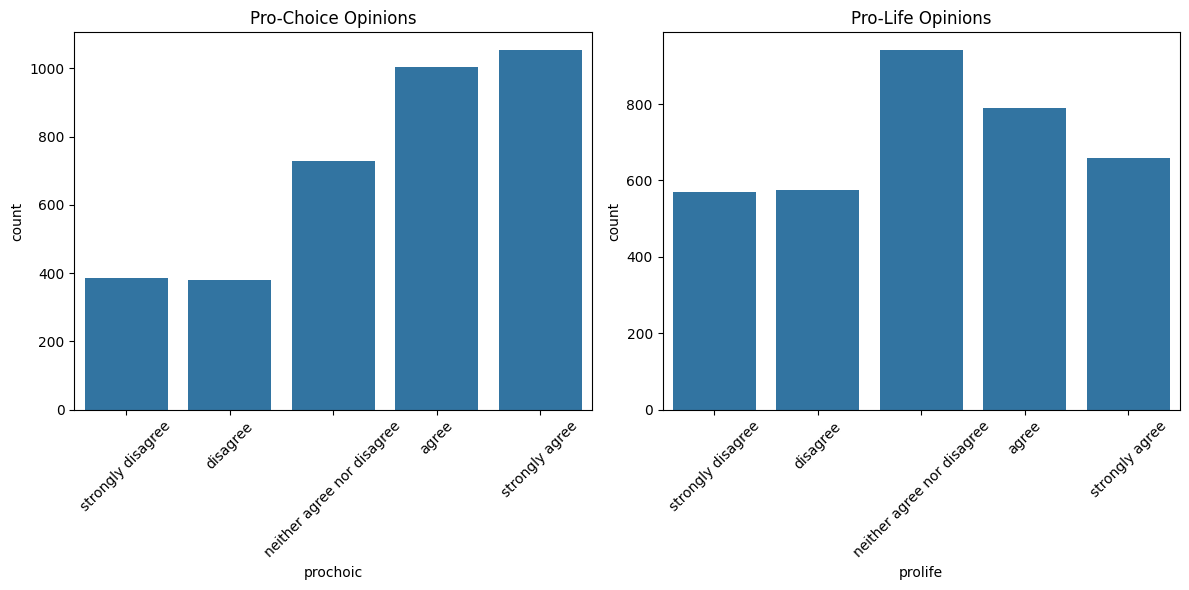

In [36]:
# Distribution of prochoic and prolife Opinions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='prochoic', data=df, order=['strongly disagree', 'disagree', 'neither agree nor disagree', 'agree', 'strongly agree'])
plt.title('Pro-Choice Opinions')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='prolife', data=df, order=['strongly disagree', 'disagree', 'neither agree nor disagree', 'agree', 'strongly agree'])
plt.title('Pro-Life Opinions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

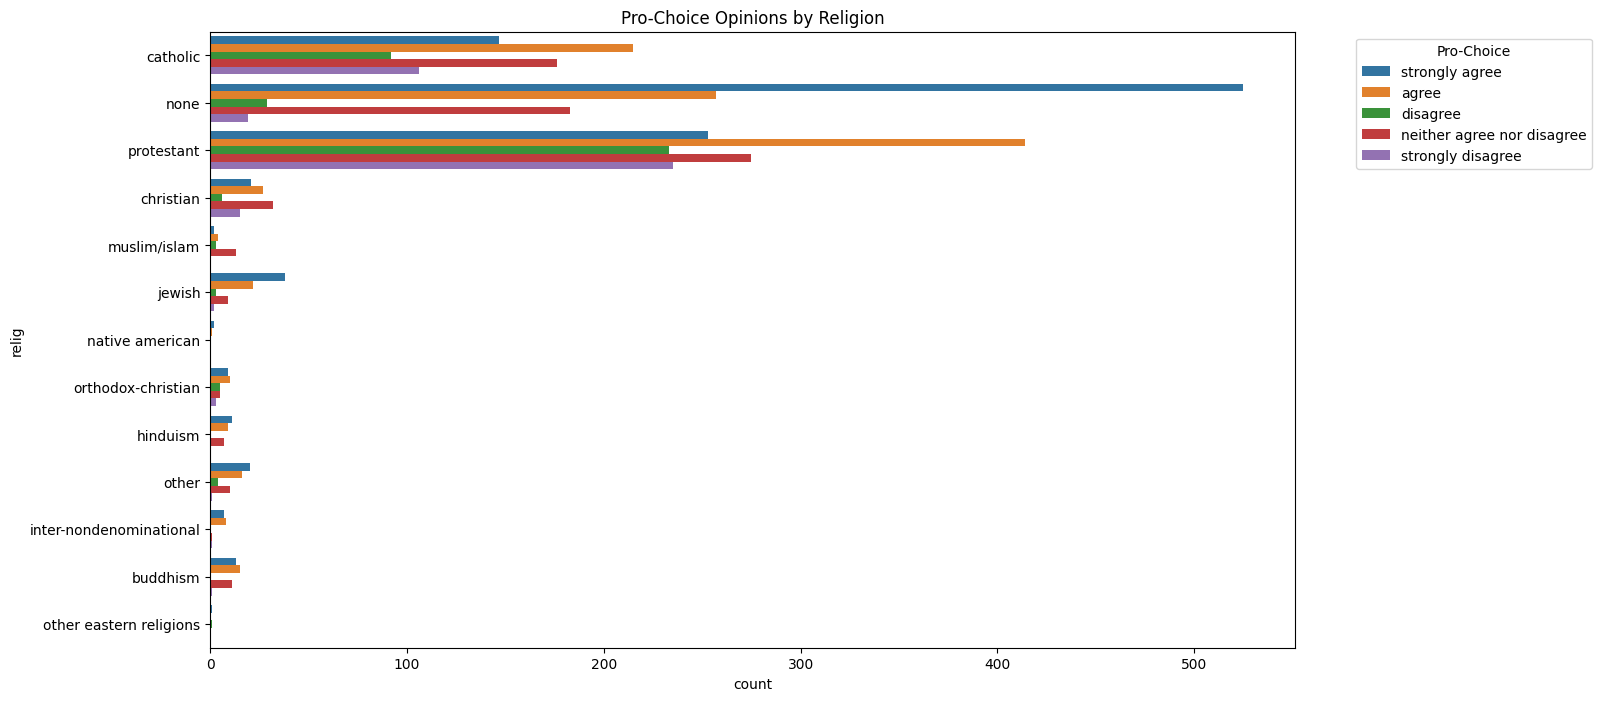

In [37]:
#Opinions by Religion
plt.figure(figsize=(14, 8))
sns.countplot(y='relig', hue='prochoic', data=df)
plt.title('Pro-Choice Opinions by Religion')
plt.legend(title='Pro-Choice', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

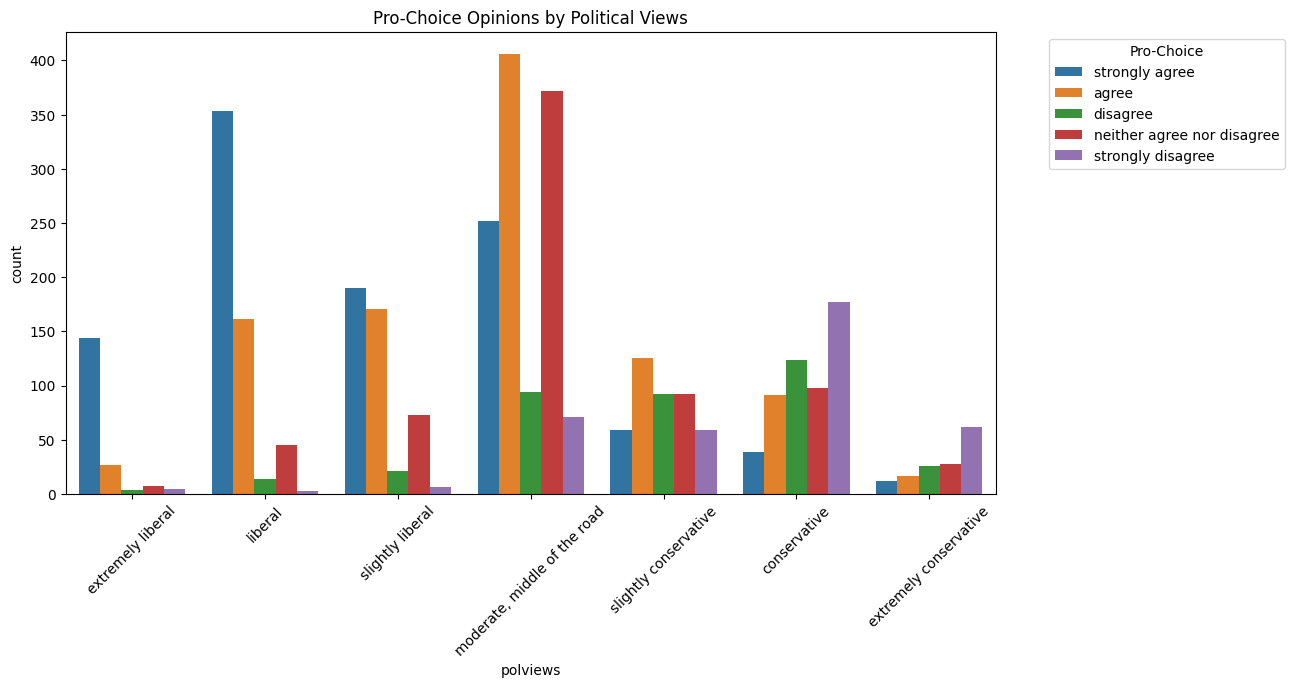

In [38]:
#Opinions by Political Views
plt.figure(figsize=(12, 6))
sns.countplot(x='polviews', hue='prochoic', data=df, order=['extremely liberal', 'liberal', 'slightly liberal', 'moderate, middle of the road', 'slightly conservative', 'conservative', 'extremely conservative'])
plt.title('Pro-Choice Opinions by Political Views')
plt.xticks(rotation=45)
plt.legend(title='Pro-Choice', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

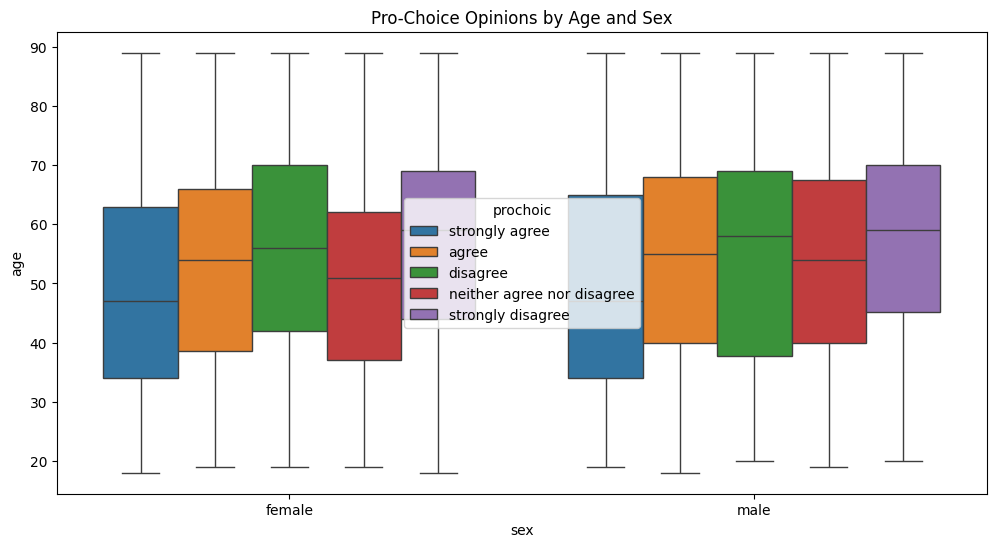

In [39]:
#Opinions by Age and Sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='age', hue='prochoic', data=df)
plt.title('Pro-Choice Opinions by Age and Sex')
plt.show()


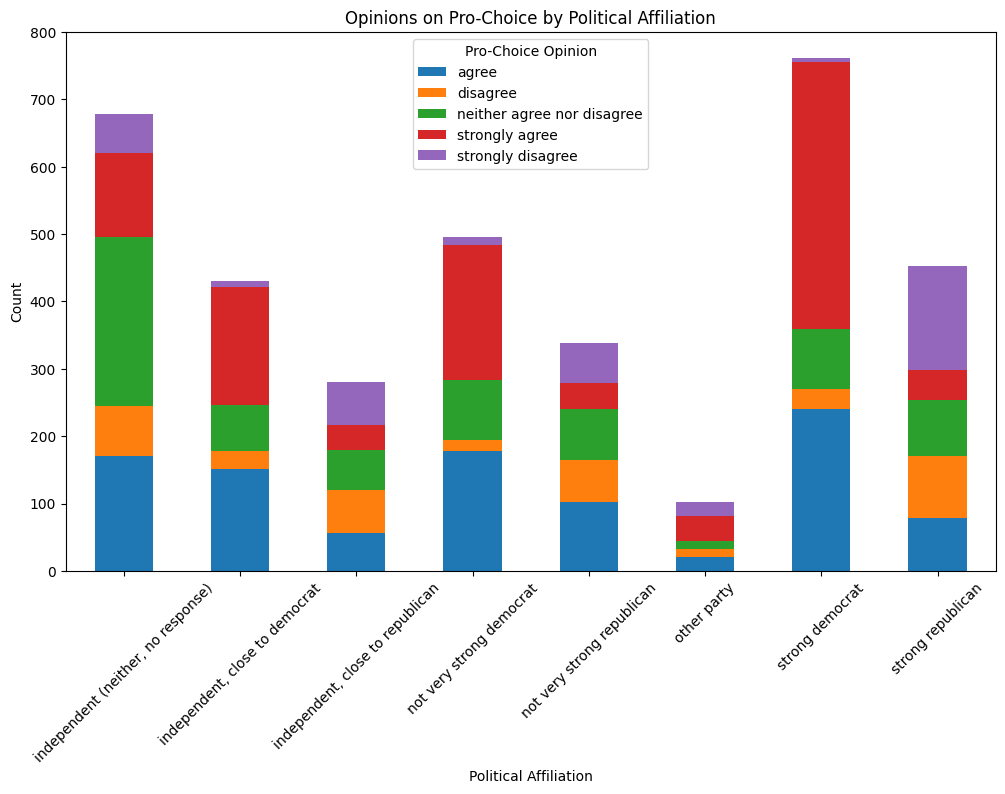

In [35]:
partyid_prochoic = pd.crosstab(df['partyid'], df['prochoic'])
partyid_prochoic.plot(kind='bar', figsize=(12, 7), stacked=True)
plt.title('Opinions on Pro-Choice by Political Affiliation')
plt.xlabel('Political Affiliation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Pro-Choice Opinion')
plt.show()

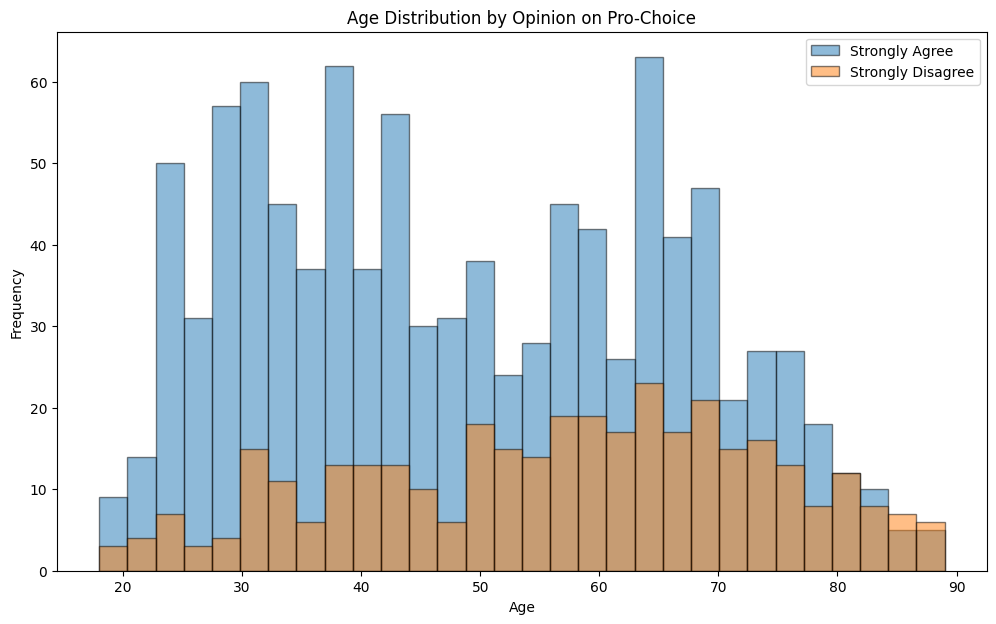

In [21]:
# Histogram Age Distribution by Opinion on Pro-Choice
agree_df = df[df['prochoic'] == 'strongly agree']['age'].dropna()
disagree_df = df[df['prochoic'] == 'strongly disagree']['age'].dropna()
plt.figure(figsize=(12, 7))

plt.hist(agree_df, bins=30, alpha=0.5, label='Strongly Agree', edgecolor='k')
plt.hist(disagree_df, bins=30, alpha=0.5, label='Strongly Disagree', edgecolor='k')

plt.title('Age Distribution by Opinion on Pro-Choice')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

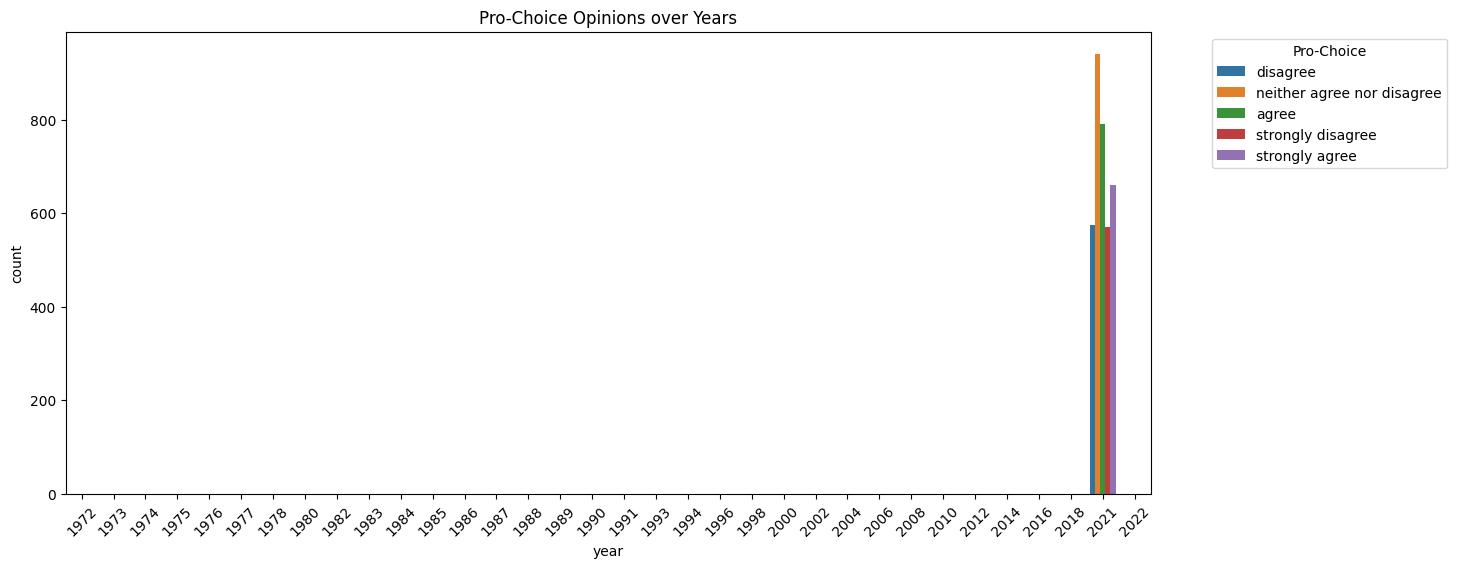

In [28]:
#Opinions by Year
plt.figure(figsize=(14, 6))
sns.countplot(x='year', hue='prolife', data=df)
plt.title('Pro-Choice Opinions over Years')
plt.xticks(rotation=45)
plt.legend(title='Pro-Choice', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()